<a href="https://colab.research.google.com/github/zainamri/Kelompok-3-/blob/main/noping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Memanggil dataset dari google drive
data = pd.read_csv('/content/drive/MyDrive/awikwok/Student Mental health.csv')
# Cek isi dataset
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
# Mengganti nama kolom
data.columns = [
    'timestamp', 'gender', 'age', 'course', 'year_of_study', 'cgpa_range',
    'marital_status', 'depression', 'anxiety', 'panic_attack', 'treatment'
]
data.columns

Index(['timestamp', 'gender', 'age', 'course', 'year_of_study', 'cgpa_range',
       'marital_status', 'depression', 'anxiety', 'panic_attack', 'treatment'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       101 non-null    object 
 1   gender          101 non-null    object 
 2   age             100 non-null    float64
 3   course          101 non-null    object 
 4   year_of_study   101 non-null    object 
 5   cgpa_range      101 non-null    object 
 6   marital_status  101 non-null    object 
 7   depression      101 non-null    object 
 8   anxiety         101 non-null    object 
 9   panic_attack    101 non-null    object 
 10  treatment       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [ ]:
# Imputasi missing value di kolom 'Age' dengan median
data['age'] = data['age'].fillna(data['age'].median())

In [ ]:
# Converting categorical columns into numeric using Label Encoding
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
data['gender'] = label_encoder.fit_transform(data['gender'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['depression'] = label_encoder.fit_transform(data['depression'])
data['anxiety'] = label_encoder.fit_transform(data['anxiety'])
data['panic_attack'] = label_encoder.fit_transform(data['panic_attack'])
data['treatment'] = label_encoder.fit_transform(data['treatment'])

# Checking the data after conversion
data.head()

,timestamp,gender,age,course,year_of_study,cgpa_range,marital_status,depression,anxiety,panic_attack,treatment
0,8/7/2020 12:02,0,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


In [ ]:
# Menggunakan LabelEncoder untuk beberapa kolom sekaligus
categorical_cols = ['gender', 'marital_status', 'depression', 'anxiety', 'panic_attack', 'treatment']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [ ]:
# 2. Membuat Atribut Target Baru: 'mental_health_issue'
data['mental_health_issue'] = data.apply(
    lambda row: 1 if row['depression'] == 1 or row['anxiety'] == 1 or row['panic_attack'] == 1 else 0,
    axis=1
)
data

,timestamp,gender,age,course,year_of_study,cgpa_range,marital_status,depression,anxiety,panic_attack,treatment,mental_health_issue
0,8/7/2020 12:02,0,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0,1
1,8/7/2020 12:04,1,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0,1
2,8/7/2020 12:05,1,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0,1
3,8/7/2020 12:06,0,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0,1
4,8/7/2020 12:13,1,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,0,21.0,BCS,year 1,3.50 - 4.00,0,0,1,0,0,1
97,13/07/2020 21:21:42,1,18.0,Engineering,Year 2,3.00 - 3.49,0,1,1,0,0,1
98,13/07/2020 21:22:56,0,19.0,Nursing,Year 3,3.50 - 4.00,1,1,0,1,0,1
99,13/07/2020 21:23:57,0,23.0,Pendidikan Islam,year 4,3.50 - 4.00,0,0,0,0,0,0


In [ ]:
# Cek distribusi target baru
print("Distribusi Atribut Target 'mental_health_issue':")
print(data['mental_health_issue'].value_counts())
print("-" * 30)

Distribusi Atribut Target 'mental_health_issue':
mental_health_issue
1    64
0    37
Name: count, dtype: int64
------------------------------


In [ ]:
# Kita akan hapus kolom yang tidak relevan atau yang menjadi 'bocoran' data
X = data.drop([
    'timestamp', 'course', 'cgpa_range', 'year_of_study',  # Kolom yang tidak terpakai/perlu perlakuan khusus
    'depression', 'anxiety', 'panic_attack', 'treatment', # Kolom bocoran
    'mental_health_issue'                                 # Kolom target
], axis=1)

y = data['mental_health_issue']

# Cek fitur yang digunakan
print("Fitur yang digunakan untuk prediksi (X):")
print(X.head())
print("-" * 30)

Fitur yang digunakan untuk prediksi (X):
   gender   age  marital_status
0       0  18.0               0
1       1  21.0               0
2       1  19.0               0
3       0  22.0               1
4       1  23.0               0
------------------------------


In [ ]:
# 4. Pembagian Data dan Penskalaan
# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
# Scaling diperlukan agar fitur dengan rentang nilai besar tidak mendominasi model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cek dimensi setelah pembagian
print("Dimensi X_train:", X_train_scaled.shape)
print("Dimensi X_test:", X_test_scaled.shape)
print("-" * 30)

Dimensi X_train: (80, 3)
Dimensi X_test: (21, 3)
------------------------------


--- Evaluasi Model: Logistic Regression ---
Akurasi: 0.62
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.65      0.85      0.73        13

    accuracy                           0.62        21
   macro avg       0.57      0.55      0.53        21
weighted avg       0.59      0.62      0.58        21



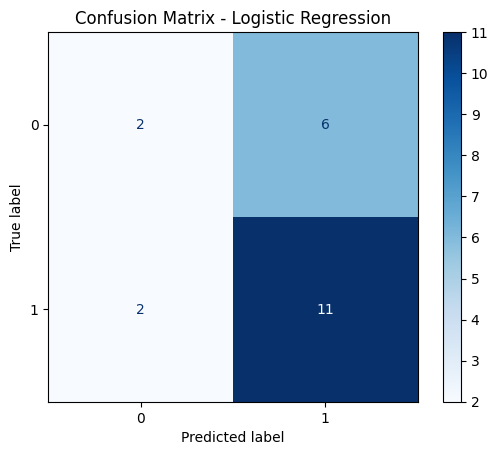


--- Evaluasi Model: K-Nearest Neighbors (KNN) ---
Akurasi: 0.62
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.67      0.77      0.71        13

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21



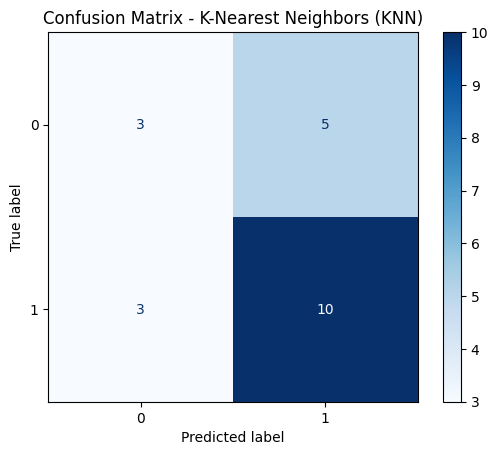


--- Evaluasi Model: Naive Bayes ---
Akurasi: 0.57
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64         8
           1       1.00      0.31      0.47        13

    accuracy                           0.57        21
   macro avg       0.74      0.65      0.56        21
weighted avg       0.80      0.57      0.54        21



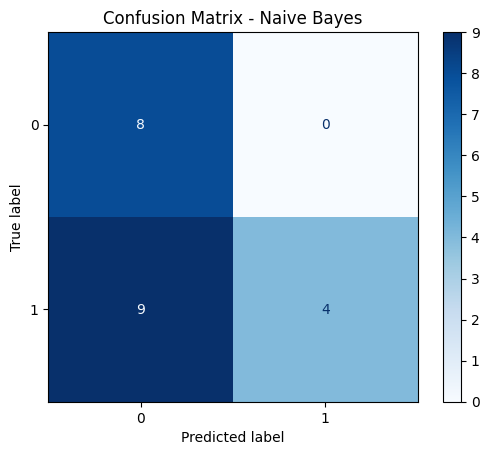


--- Evaluasi Model: Random Forest ---
Akurasi: 0.62
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.67      0.77      0.71        13

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21



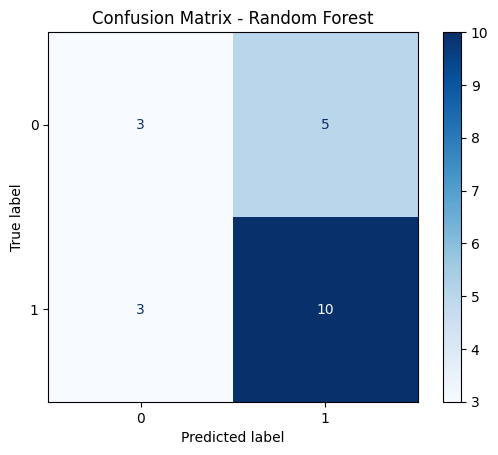


--- Evaluasi Model: Gradient Boosting ---
Akurasi: 0.62
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.67      0.77      0.71        13

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21



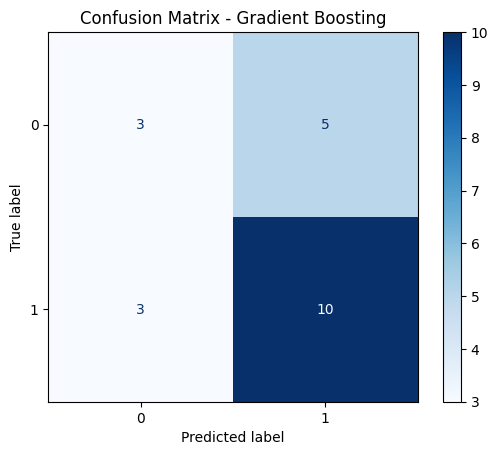

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:39:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Evaluasi Model: XGBoost ---
Akurasi: 0.62
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.67      0.77      0.71        13

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21



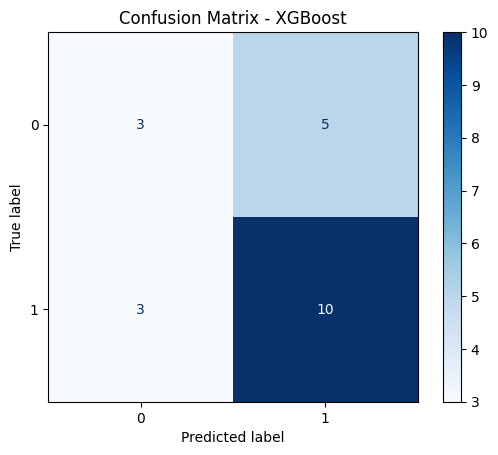

In [ ]:
# 5. Inisialisasi, Pelatihan, dan Evaluasi Model
# Menyiapkan dictionary untuk semua model yang akan diuji
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Melakukan iterasi untuk melatih dan mengevaluasi setiap model
for name, model in models.items():
    # Melatih model
    model.fit(X_train_scaled, y_train)

    # Membuat prediksi
    y_pred = model.predict(X_test_scaled)

    # Menampilkan hasil evaluasi
    print(f"--- Evaluasi Model: {name} ---")
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

    # Menampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print("=" * 40 + "\n")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:49:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Rangkuman Performa Model ---
                       Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0        Logistic Regression  0.619048             0.647059          0.846154   
1  K-Nearest Neighbors (KNN)  0.619048             0.666667          0.769231   
2              Random Forest  0.619048             0.666667          0.769231   
3          Gradient Boosting  0.619048             0.666667          0.769231   
4                    XGBoost  0.619048             0.666667          0.769231   
5                Naive Bayes  0.571429             1.000000          0.307692   

   F1-Score (Class 1)  
0            0.733333  
1            0.714286  
2            0.714286  
3            0.714286  
4            0.714286  
5            0.470588  

--- Visualisasi Perbandingan Metrik ---


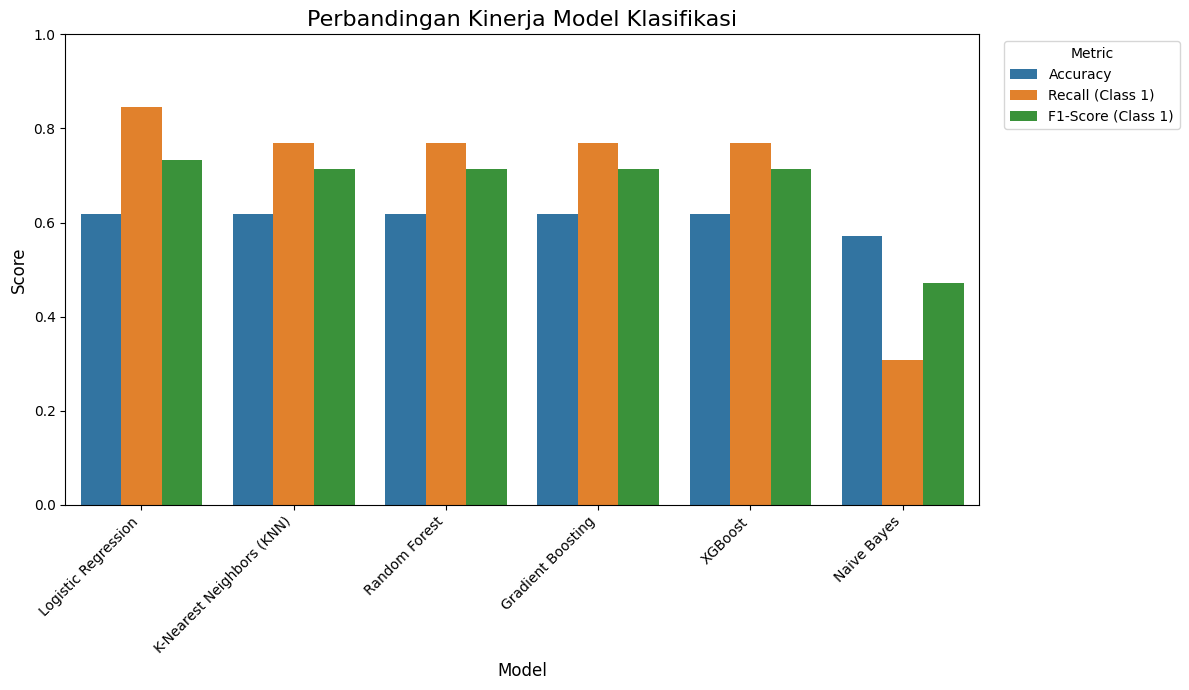

In [ ]:
# 6. Rangkuman dan Perbandingan Hasil Model

# List untuk menyimpan hasil dari setiap model
results_list = []

# Melakukan iterasi kembali untuk mengumpulkan metrik performa
for name, model in models.items():
    # Model sudah dilatih di langkah sebelumnya, kita hanya perlu membuat prediksi lagi
    # atau bisa juga melatih ulang, tidak akan memakan waktu lama.
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Menghasilkan laporan klasifikasi sebagai dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # Mengambil metrik untuk kelas 1 (memiliki masalah kesehatan mental)
    # Kelas '1' adalah kelas positif kita
    precision_class_1 = report['1']['precision']
    recall_class_1 = report['1']['recall']
    f1_score_class_1 = report['1']['f1-score']

    # Menambahkan hasil ke list
    results_list.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision (Class 1)": precision_class_1,
        "Recall (Class 1)": recall_class_1,
        "F1-Score (Class 1)": f1_score_class_1
    })

# Membuat DataFrame dari list hasil
results_df = pd.DataFrame(results_list)

# Mengurutkan DataFrame berdasarkan F1-Score untuk melihat model terbaik
results_df = results_df.sort_values(by="F1-Score (Class 1)", ascending=False).reset_index(drop=True)

# Menampilkan tabel rangkuman hasil
print("--- Rangkuman Performa Model ---")
print(results_df)

# --- Visualisasi Perbandingan Model ---
print("\n--- Visualisasi Perbandingan Metrik ---")

# Melelehkan DataFrame untuk mempermudah plotting dengan seaborn
results_melted = results_df.melt(id_vars="Model",
                                 value_vars=["Accuracy", "Recall (Class 1)", "F1-Score (Class 1)"],
                                 var_name="Metric",
                                 value_name="Score")

plt.figure(figsize=(12, 7))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")

plt.title("Perbandingan Kinerja Model Klasifikasi", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0) # Menetapkan batas y-axis antara 0 dan 1
plt.legend(title="Metric", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()